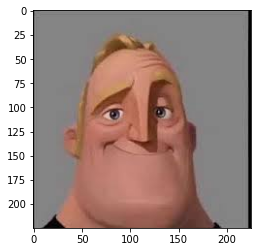

In [4]:
#Iniciamos el programa
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io

imagenSelec = plt.imread("Imagen.jpg")
plt.imshow(imagenSelec)
plt.show()

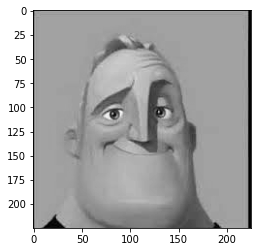

In [5]:
#Convertimos la imagen a tonos grises
imagenSelecGris = color.rgb2gray(imagenSelec)
plt.imshow(imagenSelecGris,cmap='gray')
plt.show()


In [6]:
#Hallamos el ancho y largo de la imagen
anchoImg = imagenSelecGris.shape[0]
largoImg = imagenSelecGris.shape[1]
print(anchoImg)
print(largoImg)

225
225


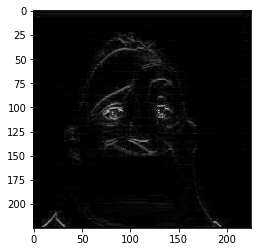

In [7]:
#Resalta el contorno por el eje x
derivadaX = np.zeros(shape=(anchoImg,largoImg)) 

for i in range(0, anchoImg-1):
    for j in range(0,largoImg-1):
        derivadaX[i][j] = abs(imagenSelecGris[i+1][j] - imagenSelecGris[i][j])
        
plt.imshow(derivadaX,cmap='gray')
plt.show()

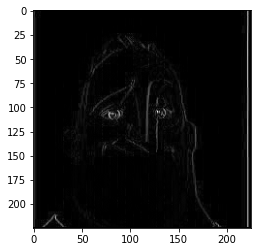

In [8]:
#Resaltamos el contorno por el eje y
derivadaY = np.zeros(shape=(anchoImg,largoImg)) 

for i in range(0, anchoImg-1):
    for j in range(0,largoImg-1):
        derivadaY[i][j] = abs(imagenSelecGris[i][j+1] - imagenSelecGris[i][j])
        
plt.imshow(derivadaY,cmap='gray')
plt.show()

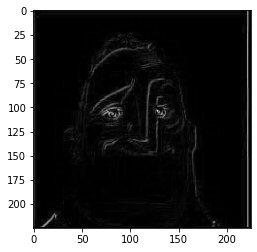

In [9]:
#Resaltamos el contorno por la diagonal izquierda 
gradienteIzq = np.zeros(shape=(anchoImg,largoImg))

#Parte superior
for i in range(0,largoImg-1):
    x = i-i
    y = i
    for j in range(0,largoImg-1-i):
        xp = x + j
        yp = y + j
        gradienteIzq[xp][yp] = abs(imagenSelecGris[xp+1][yp+1] - imagenSelecGris[xp][yp])

#Parte inferior
for i in range(0,anchoImg-1):
    x = i
    y = i-i
    for j in range(0,anchoImg-1-i):
        xp = x + j
        yp = y + j
        if(yp == largoImg-2):
            break
        else:
            gradienteIzq[xp][yp] = abs(imagenSelecGris[xp+1][yp+1] - imagenSelecGris[xp][yp])

plt.imshow(gradienteIzq,cmap='gray')
plt.show()

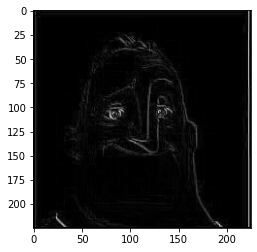

In [10]:
#Resaltamos el contorno por la diagonal derecha
gradienteDer = np.zeros(shape=(anchoImg,largoImg))

#Mitad Arriba
for i in range(largoImg-1,0,-1):
    x = i-i
    y = i
    for j in range(0,largoImg-1):
        xp = x + j
        yp = y - j
        if(yp == 1):
            break
        else:
            gradienteDer[xp][yp] = abs(imagenSelecGris[xp+1][yp-1] - imagenSelecGris[xp][yp])

#Mitad Abajo
for i in range(0,anchoImg-1):
    x = i
    y = largoImg-1
    for j in range(0,anchoImg-1-i):
        xp = x + j
        yp = y - j
        if(yp == 1):
            break
        else:
            gradienteDer[xp][yp] = abs(imagenSelecGris[xp+1][yp-1] - imagenSelecGris[xp][yp])

plt.imshow(gradienteDer,cmap='gray')
plt.show()

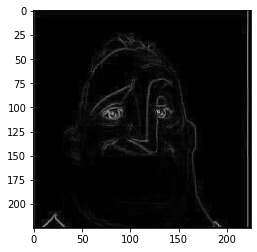

In [11]:
#Se suman los ejes X y Y
gradientePrinci=np.zeros(shape=(anchoImg,largoImg))
for i in range(0,anchoImg):
    for j in range(0,largoImg):
        gradientePrinci[i][j] = derivadaX[i][j] + derivadaY[i][j]
plt.imshow(gradientePrinci,cmap='gray')
plt.show()

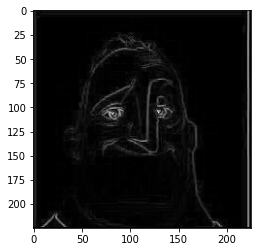

In [12]:
#Se suman las variables gradienteIzq y gradienteDer
gradienteDiagonal = np.zeros(shape=(anchoImg,largoImg))
for i in range(0,anchoImg):
    for j in range(0,largoImg):
        gradienteDiagonal[i][j] = gradienteIzq[i][j] + gradienteDer[i][j]
plt.imshow(gradienteDiagonal,cmap='gray')
plt.show()

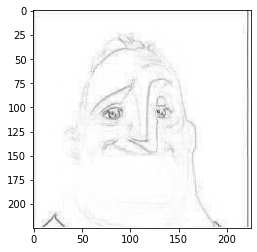

In [13]:
#Se invierten los colores de los ejes X,Y
for i in range(0,anchoImg):
    for j in range(0,largoImg):
        gradientePrinci[i][j] = 1 - gradientePrinci[i][j]
plt.imshow(gradientePrinci,cmap='gray')
plt.show()

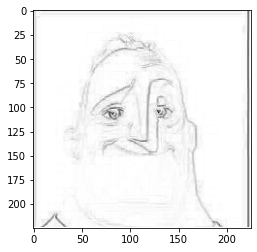

In [14]:
#Se invierten los colores de gradienteDiagonal
for i in range(0,anchoImg):
    for j in range(0,largoImg):
        gradienteDiagonal[i][j] = 1 - gradienteDiagonal[i][j]
plt.imshow(gradienteDiagonal,cmap='gray')
plt.show()

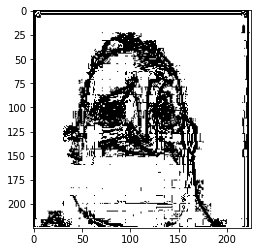

In [15]:
#Se cambian los pixeles grises a negros en X,Y
for i in range(0,anchoImg):
    for j in range(0,largoImg):
        if(gradientePrinci[i][j] < .98):
            gradientePrinci[i][j] = 0
        else:
            gradientePrinci[i][j] = 1
plt.imshow(gradientePrinci,cmap='gray')
plt.show()

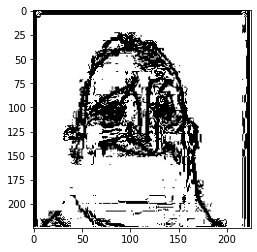

In [16]:
# Se cambian los pixeles grises a negros en gradienteDiagonal
for i in range(0,anchoImg):
    for j in range(0,largoImg):
        if(gradienteDiagonal[i][j] < .97):
            gradienteDiagonal[i][j] = 0
        else:
            gradienteDiagonal[i][j] = 1
plt.imshow(gradienteDiagonal,cmap='gray')
plt.show()

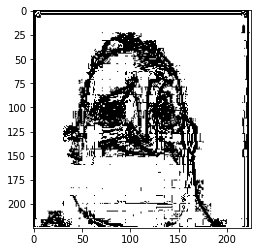

In [17]:
#Resultado Parcial Segun Ejes X y Y

plt.imshow(gradientePrinci,cmap='gray')
plt.show()

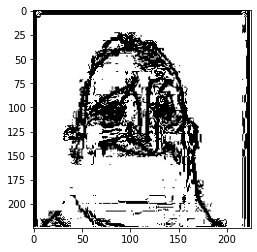

In [18]:
#Resultado Parcial segun las diagonales

plt.imshow(gradienteDiagonal,cmap='gray')
plt.show()

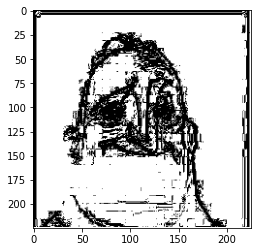

In [19]:
#Resultado final sumando ambas imagenes para darle mayor definicion
gradienteFinal= np.zeros(shape=(anchoImg,largoImg))
for i in range(0,anchoImg):
    for j in range(0,largoImg):
        gradienteFinal[i][j] = gradientePrinci[i][j] + gradienteDiagonal[i][j]
plt.imshow(gradienteFinal,cmap='gray')
plt.show()